# Solucion del problema de las N=4 reinas utilizando el Algoritmo de Grover con Qiskit.

# Introduccion


En este cuaderno se solucionará el problema de las $N$ reinas para un caso en el cual $N=4$. Para poder simular la solución con el algoritmo de Grover que se emplearía para este problema, se plantean los siguientes análisis. Primero, se plantea un análisis previo y algunas limitaciones del problema, de tal manera que lo primero que hay que tener en cuenta es que esta configuración del problema tiene únicamente dos soluciones, las cuales se muestran en la figura fig:1 y fig:2 respectivamente. **Estas soluciones cumplen con el propósito de ubicar en un tablero de 4 $\times$ 4 de ajedrez, 4 reinas que no se puedan matar entre ellas.** Como se puede ver en las imágenes de las configuraciones, es muy fácil comprobar que la disposición de las reinas en el tablero impide que se maten entre ellas. 

## Figuras 1 y 2

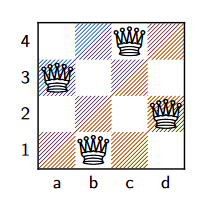

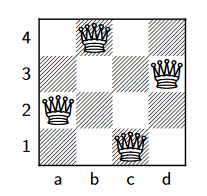

Estas son las únicas dos soluciones para este problema en $N = 4$ de reinas, que esencialmente es la misma configuración rotada 180°. Segundo, para darle solución a este problema con el algoritmo de Grover se va a ubicar una reina como ''pista'' para la solución. Como se ve en la figura fig3 se presenta la ubicación de una reina en el tablero (la ubicación corresponde a la reina en c4 de la primera solución conocida), la cual tiene 4 grados de libertad (se puede mover por 1 fila, 1 columna y 2 diagonales), dejando libres, algunas casillas sobre las cuales es posible ubicar las otras 3 reinas (Las reinas faltantes de la primera solución), esas casillas son: $\{$a3, b2, a1, b1, d1, d2$\}$; Para cada casilla se codificara su estado de lleno con un $| 1\rangle$ y su estado de vació con un $| 0 \rangle$, por tanto se emplearan 6 qubits para esta solución, los cuales representarán a cada una de las casillas. Respectivamente los qubits del circuito a simular con los que se codifican serán los siguientes $\{$0,1,2,3,4,5$\}$. Al mismo tiempo, las casillas tienen que cumplir con tres requerimientos:


*   Por cada fila únicamente debe existir 1 reina.
*   Por cada columna únicamente debe existir 1 reina.
*   Por cada diagonal debe haber 1 o 0 reinas.


## figura 3

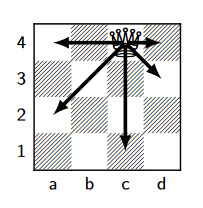

En funcion de las anteriores condiciones se genera una tabla de la verdad para verificar la condicion de fila: $\{$a1,b1,d1$\}$, esta tabla de verdad se puede ver en el cuadro I y genera la ecuacion 1,

La condicion de fila: $\{$b2, d2$\}$ y las condiciones de columna: $\{$a1, a3$\}$, $\{$b1, b2$\}$ y $\{$d1, d2$\}$ se comprueban con la tabla de verdad en el cuadro II y genera la ecuacion 2.

Para la conficion de diagonales: $\{$a1, b2$\}$ y $\{$b2, a3$\}$ Se construye la tabla de la verdad del cuadro III. Sin embargo no se utiliza la ecuacion producida directamente de esta sino que se utiliza una compuerta que cumple con el proposito directamente.

## Tablas de verdad

### Cuadro I

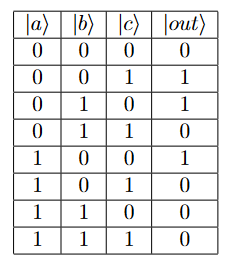

Ecuacion 1:
   $$ y = \overline{A} \; \overline{B} + \overline{A} \; \overline{C} + \overline{B} \; \overline{C} $$

### Cuadro II

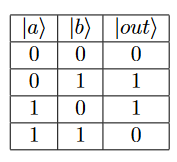


Ecuacion 2:

  $$ y = \overline{A} + \overline{B} $$

### Cuadro III

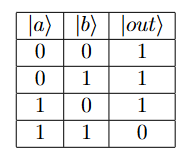

## Diseño de compuertas:

Las funciones clásicas booleanas pueden ser representadas con compuertas cuánticas de Toffoli con sus qubits de control negados (es decir, se accionan cuando todos los qubits de control son $| 0\rangle$ y de desactivan cuando todos los qubits de control son $| 1\rangle$) un esquema de diseño de esta compuerta se muestra en la figura fig4 donde esta compuerta se puede hacer a partir de dos compuertas X y una de Toffoli. Con ayuda de esta se pueden construir las 2 ecuaciones booleanas clasicas.

### figura 4

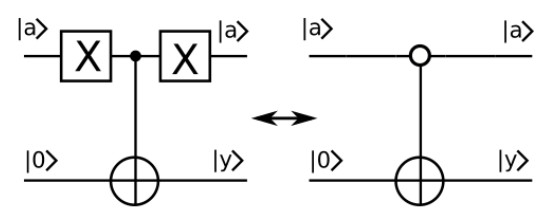

Para el caso de la condición con las diagonales, la cuadro III, se modeló con una compuerta cuántica que se diseño directamente para que se cumpla con este propósito, esta compuerta se puede ver en la fig 7. Todas las compuertas cuánticas diseñadas apuntan a un qubit de control que se inicializa en $| 0\rangle$, el cual devolverá la salida según su respectiva tabla de verdad, un $| 0\rangle$ si la condición no se cumple o un $| 1\rangle$ si así lo hace, todos estos qubits de control, después de definir su estado en función de los requerimientos del problema, van directo a una compuerta Toffoli de 7 entradas (debido a que son 7 las condiciones que se tienen que cumplir para que la solución buscada sea la correcta), esta ultima compuerta hace las veces de phase kickback, (Ver figura fig 8), todos los qubits de entrada ($\{$0,1,2,3,4,5$\}$) son operados por las compuertas diseñadas anteriormente y como las combinaciones a comprobar son 7 y una condición final para comprobar todas y efectuar el phase kickback, se dispone para este circuito 8 qubits auxiliares de entrada inicializados en $| 0\rangle$.

### figura 5

Compuerta cuantica para caso de fila 3 casillas (Cuadro I)

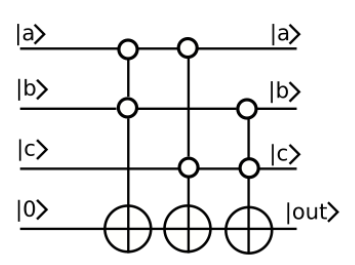

### figura 6

Compuerta cuantica para caso de fila y columna 2 casillas (Cuadro II)

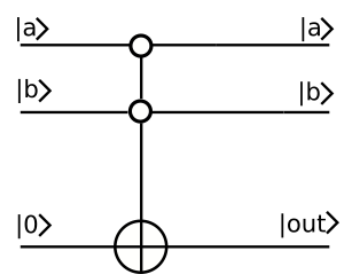

### figura 7

Compuerta cuantica para caso de diagonales 2 casillas (Cuadro III)

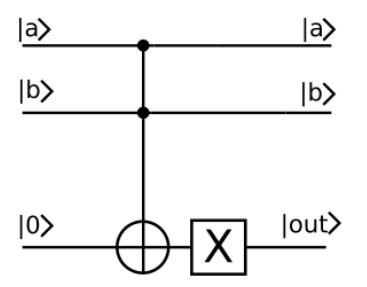

La arquitectura entonces sera de la siguiente manera: Se implementara la simulación con un total de 14 qubits, donde los 6 primeros serán los usados para codificar las 6 casillas disponibles después de poner la reina de pista en la posición c4 en el tablero, 7 qubits para comprobar cada una de las condiciones de fila, columna y diagonal entre las casillas vacías, un qubit que se encarga de realizar e efecto phase kickback y al final 6 bits clásicos sobre los cuales se hará la medida de los 6 primero qubits para encontrar el estado solución. Debido a que los 3 tipos de compuertas generadas son definiciones generales en la simulación se dispondrá una lista de requerimientos las cuales tendrán las combinatorias de los índices de las casillas necesarios para corroborar las restricciones del problema.

### figura 8

Arquitectura del algoritmo de grover para este experimento:

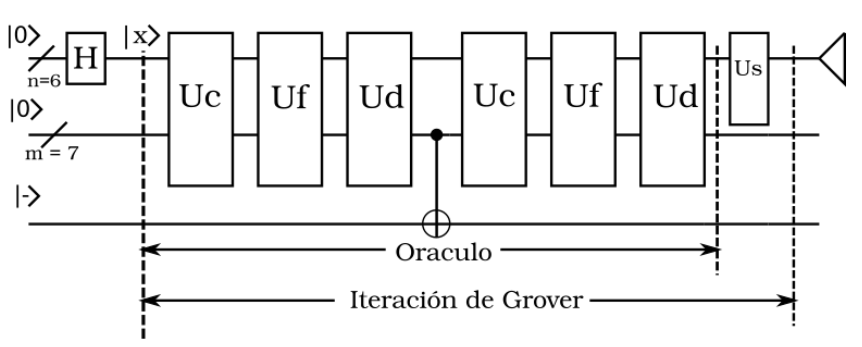

# Codigo

## Librerias

In [1]:
! pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 19.2 MB 1.3 MB/s 
     |████████████████████████████████| 240 kB 62.0 MB/s 
     |████████████████████████████████| 112 kB 56.4 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 943 kB 33.6 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 4.0 MB 39.5 MB/s 
     |████████████████████████████████| 1.9 MB 35.6 MB/s 
     |████████████████████████████████| 112 kB 40.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=818adde3a39b57fcb16723ea04fba7017b468d390a3d3c369a45582000ee25b6
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

## Funcion de Toffoli Negada:

In [3]:
def Toffoli_neg(qc,input, output):
  for qbi in input:
    qc.x(qbi)
  qc.mct(input, output)
  for qbi in input:
    qc.x(qbi)

## Funcion para verificar condiciones de filas y columnas:

In [4]:
def f_boolean_rc(qc,input,output):
  if len(input) == 3: # Caso de 3 casillas (Para este ejemplo solo una comprobacion en fila)
    A = input[0]
    B = input[1]
    C = input[2]
    Toffoli_neg(qc, [A,B], output)
    qc.barrier()
    Toffoli_neg(qc, [A,C], output)
    qc.barrier()
    Toffoli_neg(qc, [B,C], output)
    qc.barrier()
  elif len(input) == 2: # Caso de 2 casillas
    A = input[0]
    B = input[1]
    qc.barrier()
    Toffoli_neg(qc, [A], output)
    qc.barrier()
    Toffoli_neg(qc, [B], output)
    qc.barrier()

## Funcion para comprobar condiciones de diagonales:

In [5]:
def f_boolean_d(qc,input,output):
  qc.mct(input,output)
  qc.x(output)
  qc.barrier() 

## Listas de posibilidades

In [6]:
# Casillas para comprobar en filas y columnas:
List_couple_rc = [[2,3,4,6], # caso fila con 3 casillas.
                  [1,5,7],
                  [0,2,8],
                  [1,3,9],
                  [5,4,10]]
# Casillas para comprobar en diagonales:
List_couple_d = [[0,1,11],
                 [1,2,12]]

## Oraculo

In [7]:
# Oraculo:
# Este oraculo esta compuesto de todas las comprobaciones anteriores
# si todas las comprobaciones son "si -> 1" invierte el estado
# buscado sino para "no -> 0" no invierte el estado:
def oracle(qc,clause_qubits, output_qubit,L1,L2):
  for entry in L1:
    n = len(entry)
    f_boolean_rc(qc,entry[0:n-1],entry[-1])
  for entry in L2:
    n = len(entry)
    f_boolean_d(qc,entry[0:n-1],entry[-1])
  qc.mct(clause_qubits, output_qubit)
  qc.barrier()
  for entry in L1:
    n = len(entry)
    f_boolean_rc(qc,entry[0:n-1],entry[-1])
  for entry in L2:
    n = len(entry)
    f_boolean_d(qc,entry[0:n-1],entry[-1])

## Difusor (Inversion sobre la media):

In [8]:
# Esta funcion fue copiada del tutorial de Qiskit sobre el algoritmo de Grover:

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

## Ejecucion:

In [9]:
# Crear 6 qubits para codificar las posibles soluciones
var_qubits = QuantumRegister(6, name='v')
# Crear 7 qubits auxiliares para comprobar las 7 posibilidades (filas, columnas y diagonales)
clause_qubits = QuantumRegister(7, name='c')
# Crear 1 qubit para el oraculo:
output_qubit = QuantumRegister(1, name='out')
# Crear 6 qubits clasicos para medir:
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)
# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)
# superponer todos los qubits para   las posibles soluciones |s>
qc.h(var_qubits)
qc.barrier()  # barrera para visualizacion
for i in range(8): # 8 iteraciones
  ## Primera iteraciones
  # Poner oraculo
  oracle(qc,clause_qubits, output_qubit,List_couple_rc,List_couple_d)
  qc.barrier()  # barrera para visualizacion
  # aplicar difusor
  qc.append(diffuser(6), [0,1,2,3,4,5])
# Medir:
qc.measure(var_qubits, cbits)
# Mostrar:
qc.draw(fold=-1)

┌───┐               ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐                ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░       ░                 ░                 ░                 ░  ░                 ░                 ░  ░ ┌───┐     ┌───┐ ░                 ░  ░                 ░                 ░  ░                 ░                 ░            ░            ░  ░ ┌────────┐┌─┐               
    v_0: ──────

In [10]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_simulator.run(qobj).result()

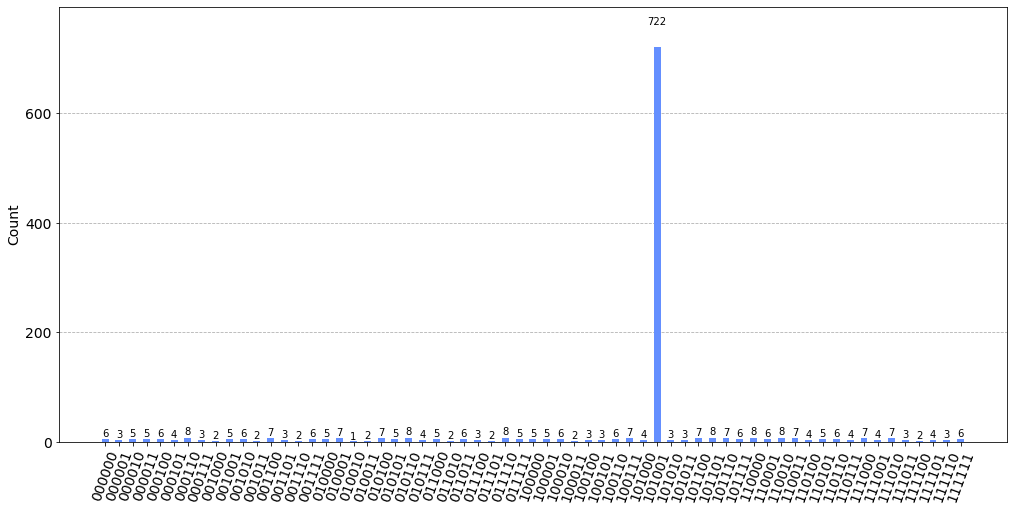

In [12]:
plot_histogram(result.get_counts(),figsize=(17, 8))

De la imagen fig 9 se puede extraer que la solución $| 101001 \rangle$ $\rightarrow$  $\{5,4,3,2,1,0\}$ fue la que con diferencia, brinda la solución al problema, lo cual concuerda con las reinas que muestran en la figura 1 las posiciones en las que deben estar las 3 reinas faltantes son a3 que codifica con el qubit 0, b1 que codifica con el qubit 3 y d2 que codifica con el qubit 5. Este histograma es obtenido después de aplicar la iteración de Grover un total de 8 veces. La arquitectura del circuito cuántico se puede ver en la figura 8, en donde el oráculo esta compuesto por una sección de funciones que son producto de las compuertas cuánticas descritas para comprobar que las condiciones de filas, columnas y diagonales, todas estas condiciones se recogen en una linea de $m=7$ qubits auxiliares los cuales van a una compuerta de Toffoli para que se pueda realizar el phase kickback, es importante mencionar que para ahorrar qubits se utiliza una técnica denominada en ingles "uncomputing" el cual es volver a ejecutar las mismas funciones previas a la compuerta de Toffoli para "resetear" la linea de qubits auxiliares a un estado de $|0\rangle$ nuevamente. Por tanto el oráculo esta compuesto de 3 secciones importantes, la parte de computing que comprueba las condiciones, el phase kickback y el uncomputing. El oráculo mas el difusor genera una iteración de Grover. Este circuito se logro simular gracias a un algoritmo que recibe los índices de los qubits y los combina según las especificaciones del problema en la diferentes funciones creadas y después de medirse en una base computacional se obtiene el histograma y por tanto confirma la solución en la figura 1.